In [49]:
#Import Necessary Packages
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualisation

Text(0.5, 1.0, 'Distribution Of Age')

<Figure size 300x300 with 0 Axes>

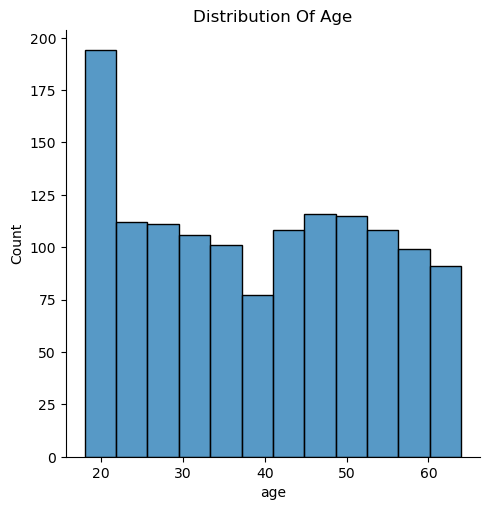

In [15]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='age')
plt.title('Distribution Of Age')

Text(0.5, 1.0, 'Distribution Of Sex')

<Figure size 300x300 with 0 Axes>

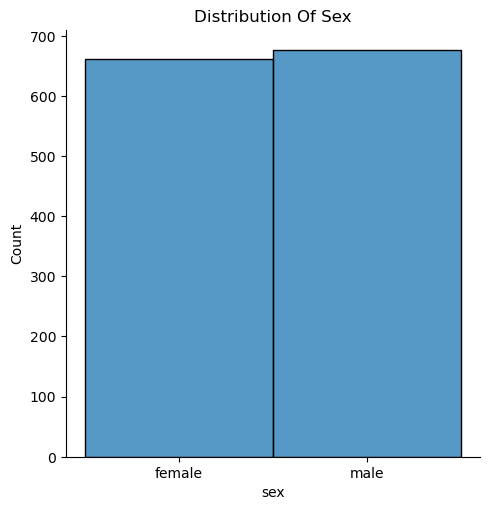

In [17]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='sex',kind='hist')
plt.title('Distribution Of Sex')

In [18]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

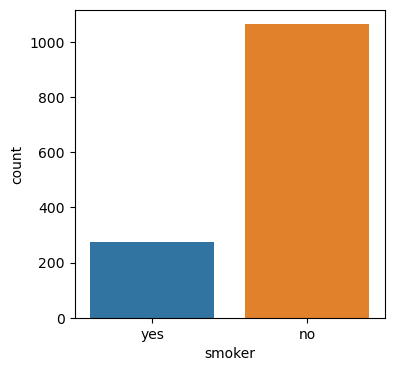

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='smoker')

## Convert categorical columns to numerical

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [27]:
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df['smoker']=lb.fit_transform(df['smoker'])
df['region']=lb.fit_transform(df['region'])

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [29]:
#0--->female  1--->male
#0--->no 1--->yes
#0-->northeast 1--->northwest   --->southeast   ---->southwest

# Training the model

In [34]:
x=df.drop('charges',axis=1)
print(x)
y=df['charges']
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape

((1070, 6), (1070,))

In [51]:
#Model Selection
lr = LinearRegression()
lr.fit(x_train,y_train)
svm = SVR()
svm.fit(x_train,y_train)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)


GradientBoostingRegressor()

In [53]:
#Prediction on Test Data
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gr.predict(x_test)

In [55]:
#Evaluating the Algorithm
score1 = r2_score(y_test,y_pred1)
score2 = r2_score(y_test,y_pred2)
score3 = r2_score(y_test,y_pred3)
score4 = r2_score(y_test,y_pred4)

In [56]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07230823043884493 0.8607076478998281 0.8779726251291786


In [59]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [61]:
y_preds=gr.predict(x_test)
r2_score(y_test,y_preds)

0.877993618163719

In [57]:
#from the above models gradientboosting regressor gave the better score,so we choose it

## Prediction System

In [62]:
input_df=(32,1,28.880,0,0,1)
np_df=np.asarray(input_df)
input_df_reshape=np_df.reshape(1,-1)
prediction=gr.predict(input_df_reshape)
print('Medical Insurance is:',prediction)

Medical Insurance is: [4206.17630525]
